In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import datetime

In [9]:
# Data gathering: get stock data from Yahoo Finance using pandas_datareader
start_date = '2010-01-01'
end_date = datetime.date.today().strftime("%Y-%m-%d") or '2024-01-01'
# Usually, bigger the time frame to pick the data, the better the prediction.
# However, the data gathering process will be slower and the processing times will increase
# as the amount of data increases.
# The start_date and end_date can be changed to get different data.
# Using yahoo finance to extract the data for the stock of dynamically
df = yf.download('AAPL', start_date, end_date)


[*********************100%%**********************]  1 of 1 completed


In [10]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370183,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358409,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [11]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-09,182.559998,184.660004,182.110001,184.570007,184.320007,48983000
2024-05-10,184.899994,185.089996,182.130005,183.050003,183.050003,50759500
2024-05-13,185.440002,187.100006,184.619995,186.279999,186.279999,72044800
2024-05-14,187.509995,188.300003,186.289993,187.429993,187.429993,52393600
2024-05-15,187.910004,190.649994,187.369995,189.720001,189.720001,70356000


In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3.616000e+03
mean,62.980457,63.647111,62.342022,63.021772,60.912023,2.375976e+08
std,57.872030,58.499472,57.290515,57.922825,58.264039,2.194818e+08
min,6.870357,7.000000,6.794643,6.858929,5.798901,2.404830e+07
25%,20.053572,20.257679,19.821697,20.029196,17.198467,8.962410e+07
50%,34.818750,34.976250,34.693748,34.857500,32.495131,1.475104e+08
75%,116.744999,118.471876,115.192499,116.395000,114.020439,3.205216e+08
max,198.020004,199.619995,197.000000,198.110001,197.589523,1.880998e+09


In [13]:
# Since, the data is highly structured and clean, there is no need to clean the data.
# For prediction purposes we don't need the date, and AdjClose columns.
df.reset_index(inplace=True)
df.drop(['Date', 'Adj Close'], axis=1, inplace=True)

In [14]:
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


In [15]:
# Let's understand the 100 days moving average along with 200 days moving average
ma100 = df['Close'].rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3611    180.2590
3612    180.1138
3613    180.0177
3614    179.9226
3615    179.8715
Name: Close, Length: 3616, dtype: float64

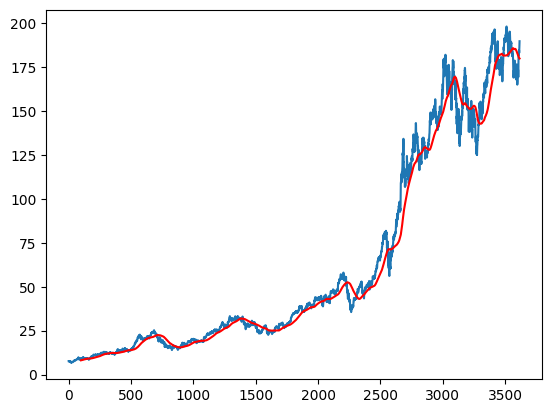

In [18]:
plt.plot(df['Close'])
plt.plot(ma100, 'r')
# With this plot we understand that 100 moving average can predict the strock trend. 

In [19]:
ma200 = df['Close'].rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3611    180.98705
3612    180.92980
3613    180.89510
3614    180.85310
3615    180.81945
Name: Close, Length: 3616, dtype: float64

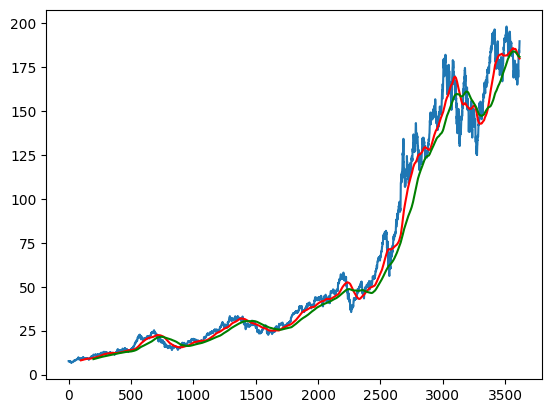

In [21]:
plt.plot(df['Close'])
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
# We can use the 100 ma, along with 200ma to predict the stock trend.
# to keep track of the older states, we can use LSTM, as it can remember the older states. in order to predict the future states.

In [123]:
training_data= pd.DataFrame(df['Close'][0: int(len(df['Close']) * 0.70 )]) # 70% of the data as training data
test_data= pd.DataFrame(df['Close'][int(len(df['Close']) * 0.70 ): ] )# remaining 30% of the data as testing data

In [124]:
print(training_data.shape)
print(test_data.shape)

(2531, 1)
(1085, 1)


In [125]:
training_data

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714
...,...
2526,78.809998
2527,79.682503
2528,79.142502
2529,79.425003


In [126]:
#After scaling the data, the data will be between 0 and 1
# Easier for the LSTM memory to remember the data, because of the
# overall stability of the activation functions, and the gradients. 
# minimising he risk of exploding or vanishing gradients. Since the values are
# constrained b/w 0 and 1, the gradients will be stable as well.


In [129]:
scaler = MinMaxScaler(feature_range=(0,1))
training_data_array = scaler.fit_transform(training_data)

In [130]:
print("After scaling the training data:")
training_data_array

After scaling the training data:


array([[0.0107512 ],
       [0.01093235],
       [0.00926288],
       ...,
       [0.99088398],
       [0.99475658],
       [1.        ]])

In [131]:
x_train = []
y_train = []

# Training with 100 days of data, and predicting the 101st day data.
for i in range(100, training_data_array.shape[0]):
    x_train.append(training_data_array[i-100: i]) # First 0 - 99 days data gone as in training
    y_train.append(training_data_array[i, 0]) # 100th day data as output

In [133]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [134]:
x_train.shape

(2431, 100, 1)

In [135]:
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential

In [209]:
model = Sequential()
model.add(LSTM(units = 40, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2)) # Applies dropout regularization with a rate of 0.2, which randomly sets 20% of the input units to zero during training to reduce overfitting.



model.add(LSTM(units = 50, activation='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 70, activation='relu', return_sequences=True))
model.add(Dropout(0.4))



model.add(LSTM(units = 100, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))  # units = 1, because we have to predcit only 1 value ie. Close



c:\Users\Aniket\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [210]:
print("Model Summary:")
model.summary()

Model Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                  │ (None, 100, 40)        │         6,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 100, 40)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 100, 50)        │        18,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 100, 70)        │        33,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 100, 70)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 100)            │        68,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,301 (497.27 KB)

 Trainable params: 127,301 (497.27 KB)

 Non-trainable params: 0 (0.00 B)

In [211]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs= 50)


Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - loss: 0.0577
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 197ms/step - loss: 0.0051
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 18s 236ms/step - loss: 0.0041
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 267ms/step - loss: 0.0041
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 16s 207ms/step - loss: 0.0041
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 16s 209ms/step - loss: 0.0050
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 200ms/step - loss: 0.0036
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 16s 203ms/step - loss: 0.0032
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 201ms/step - loss: 0.0031
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 197ms/step - loss: 0.0025
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 200ms/step - loss: 0.0032
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 16s 208ms/step - loss: 0.0023
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 203ms/step - loss: 0.0026
Epoch 14/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 202ms/step - loss: 0.0022
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 

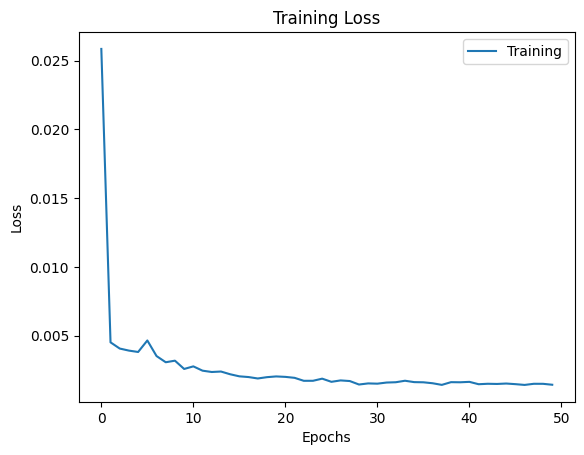

In [212]:
# Plot training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training'])
plt.show()

In [213]:
model.save('keras_model1_self.h5')

In [214]:
training_data.tail()

,Close
2526,78.809998
2527,79.682503
2528,79.142502
2529,79.425003
2530,79.807503


In [215]:
test_data

,Close
0,79.577499
1,77.237503
2,79.422501
3,81.084999
4,80.967499
...,...
1080,184.570007
1081,183.050003
1082,186.279999
1083,187.429993


In [216]:
# To make test predictions for the first row of testing data
# we need last 100 days data, that we can fetch from the last 100 rows of 
# training data. 
past_100_days = training_data.tail(100)

past_100_days.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Concatenate past_100_days and test_data with ordered indices
final_df_testing = pd.concat([past_100_days, test_data], ignore_index=True)

In [217]:
final_df_testing.shape
testing_data_array = scaler.fit_transform(final_df_testing)

In [218]:
print("Scaled entire testing data, After scaling the testing data:")
testing_data_array

Scaled entire testing data, After scaling the testing data:


array([[0.00518119],
       [0.        ],
       [0.00594813],
       ...,
       [0.91935098],
       [0.92719087],
       [0.94280261]])

In [219]:
# Now, create the x_test and y_test, to evaluate the model, and make predictions.
x_test = []
y_test = []

for i in range(100, testing_data_array.shape[0]):
    x_test.append(testing_data_array[i-100: i])
    y_test.append(testing_data_array[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [220]:
print(x_test.shape)
print(y_test.shape)

(1085, 100, 1)
(1085,)


In [221]:
y_test

array([0.19192487, 0.17597235, 0.19086819, ..., 0.91935098, 0.92719087,
       0.94280261])

In [222]:
y_pred = model.predict(x_test)
print(y_pred.shape)

34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step
(1085, 1)


In [223]:
# Now, go inverse scale them, to get actual accuracy and easy analysis of
# the predictions.
print("Scale : ", scaler.scale_)
scale_factor = 1/ scaler.scale_
y_test_actual = y_test * scale_factor
y_pred_actual = y_pred * scale_factor

Scale :  [0.00681733]


In [224]:
y_test_actual

array([ 28.15250015,  25.81250381,  27.99750137, ..., 134.85499954,
       136.00499344, 138.29500198])

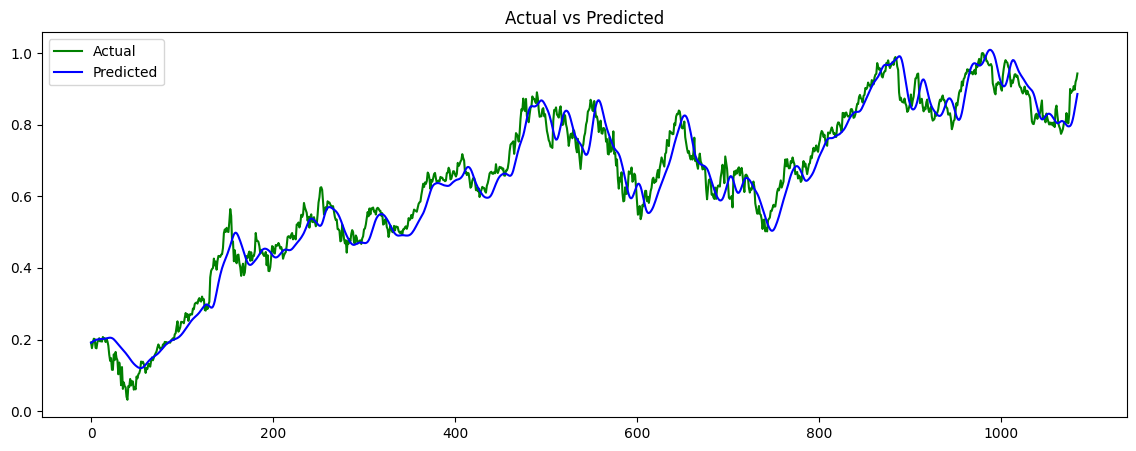

In [225]:
plt.figure(figsize=(14, 5))
plt.plot(y_test, 'g', label='Actual')
plt.plot(y_pred, 'b', label='Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [229]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Testing metrics\n")

print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)

Testing metrics

Mean Absolute Error:  0.03630688176257539
Root Mean Squared Error:  0.04507121180491925


c:\Users\Aniket\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [230]:
y_pred_train = model.predict(x_train)

mae = mean_absolute_error(y_train, y_pred_train)
rmse = mean_squared_error(y_train, y_pred_train, squared=False)

print("Training metrics\n")
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step
Training metrics

Mean Absolute Error:  0.021599842967636538
Root Mean Squared Error:  0.02642945330242529


c:\Users\Aniket\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [228]:
print("DONE")

DONE
